## Predictive Model for Agriculture Using Gradient Bosting Classifier

## Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

# Loading the dataset
data = pd.read_csv('soil_measures.csv')

## Checking the null values

In [2]:
# Checking for any missing values
print(data.isnull().sum())

N       0
P       0
K       0
ph      0
crop    0
dtype: int64


## Scalling Data for preprocessing and Splitting Data into test and train Data

In [3]:
scaler = StandardScaler()
features = ['N', 'P', 'K', 'ph']  # List of features to scale
data[features] = scaler.fit_transform(data[features])

In [4]:
# Splitting the data into features and target
X = data.drop('crop', axis=1)
y = data['crop']

In [5]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialization of GBC() and Model Training 

In [6]:
# Initializing the Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [7]:
# Training the model
gbm.fit(X_train, y_train)

# Predicting on the test set
y_pred = gbm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7886363636363637


In [8]:
# Generating a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       0.75      0.65      0.70        23
      banana       1.00      1.00      1.00        21
   blackgram       0.81      0.85      0.83        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.79      0.81      0.80        27
      coffee       0.94      0.94      0.94        17
      cotton       0.89      1.00      0.94        17
      grapes       0.53      0.64      0.58        14
        jute       0.50      0.70      0.58        23
 kidneybeans       0.77      0.85      0.81        20
      lentil       0.38      0.55      0.44        11
       maize       1.00      0.95      0.98        21
       mango       0.72      0.68      0.70        19
   mothbeans       0.95      0.83      0.89        24
    mungbean       0.78      0.95      0.86        19
   muskmelon       0.60      0.53      0.56        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

## Model Tuninng Using RandomizedSearchCV()

In [9]:
# Defining the parameter distributions
param_distributions = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 4, 6]
}

# Initializing RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gbm, param_distributions=param_distributions, 
                                   n_iter=50, cv=5, scoring='accuracy', verbose=1, 
                                   random_state=42, n_jobs=-1)

# Performing the random search
random_search.fit(X_train, y_train)

print("Best Parameters: ", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters:  {'n_estimators': 200, 'min_samples_split': 6, 'max_depth': 6, 'learning_rate': 0.01}


In [10]:
# Getting the best model
best_gbm = random_search.best_estimator_

In [11]:
# predicting on the test data using the best model
y_pred_best = best_gbm.predict(X_test)


## Evaluating the Model again

In [12]:
# Evaluating the best model
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Best Model Test Accuracy: {best_accuracy}")
print(classification_report(y_test, y_pred_best))

Best Model Test Accuracy: 0.8068181818181818
              precision    recall  f1-score   support

       apple       0.75      0.65      0.70        23
      banana       1.00      1.00      1.00        21
   blackgram       0.84      0.80      0.82        20
    chickpea       1.00      1.00      1.00        26
     coconut       0.84      0.78      0.81        27
      coffee       0.94      0.94      0.94        17
      cotton       0.89      1.00      0.94        17
      grapes       0.53      0.64      0.58        14
        jute       0.66      0.83      0.73        23
 kidneybeans       0.76      0.80      0.78        20
      lentil       0.42      0.73      0.53        11
       maize       1.00      0.95      0.98        21
       mango       0.72      0.68      0.70        19
   mothbeans       0.87      0.83      0.85        24
    mungbean       0.78      0.95      0.86        19
   muskmelon       0.57      0.71      0.63        17
      orange       1.00      1.00   

## Extracting the important features of our model

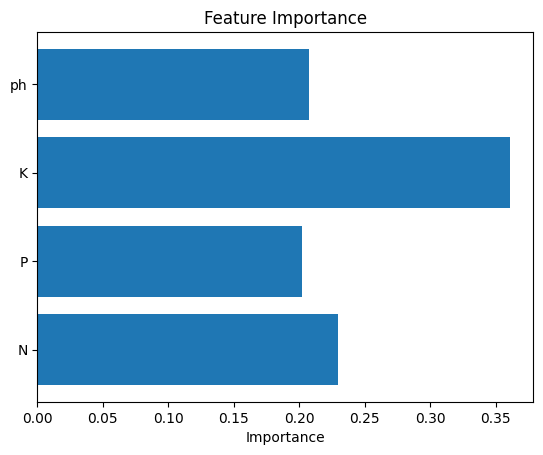

In [13]:
# Get feature importance from the best model
importance = best_gbm.feature_importances_
plt.barh(range(len(importance)), importance)
plt.yticks(range(len(importance)), X_train.columns)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


## Loading and exporting our Best Model After Tuning and features extraction

## Exporting the model using Pickle

In [14]:
import pickle

with open('best_gbm_model.pkl', 'wb') as file:
    pickle.dump(best_gbm, file)

In [15]:
with open('best_gbm_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

## Using our model to predict on a given data set 

In [16]:
data = pd.read_csv("testData.csv")

In [17]:
predictions = loaded_model.predict(data)

## Using numpy to compute a comprehensible plot of our predicted data

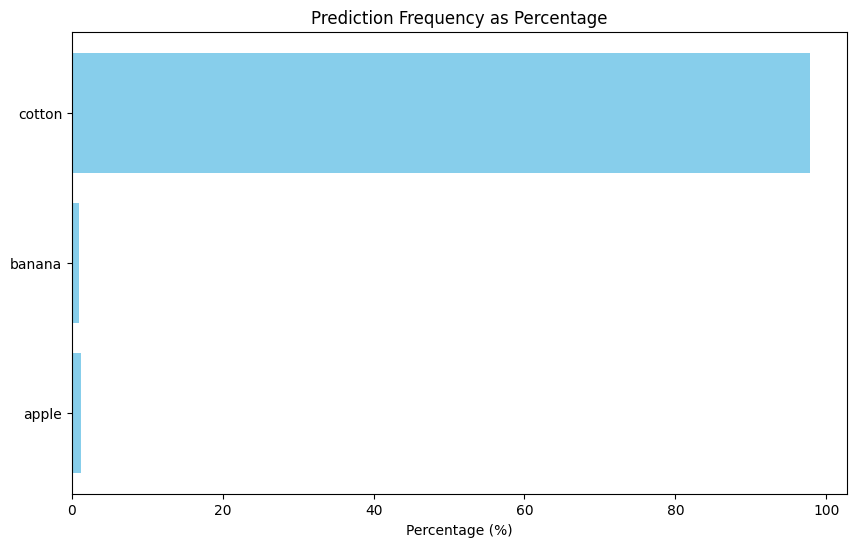

In [18]:
unique, counts = np.unique(predictions, return_counts=True)
total_predictions = len(predictions)
percentages = (counts / total_predictions) * 100

print(percentages)

# Create the plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
plt.barh(unique, percentages, color='skyblue')
plt.xlabel('Percentage (%)')
plt.title('Prediction Frequency as Percentage')
plt.show()